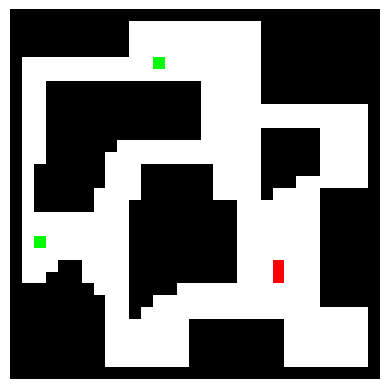

Matriz discretizada:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1]
 [1 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def discretize_image_and_matrix(image_path, pixel_size):
    # Abrir la imagen
    image = Image.open(image_path)
    image = image.convert('RGB')

    # Convertir la imagen a un array numpy
    image_array = np.array(image)
    height, width, _ = image_array.shape

    # Crear una nueva imagen con el tamaño adecuado para agregar el marco negro
    padded_height = height + 2 * pixel_size
    padded_width = width + 2 * pixel_size
    padded_image_array = np.zeros((padded_height, padded_width, 3), dtype=np.uint8)

    # Agregar el marco negro alrededor de la imagen original
    padded_image_array[pixel_size:pixel_size + height, pixel_size:pixel_size + width, :] = image_array

    # Ajustar las dimensiones de la imagen para que sean múltiplos de pixel_size
    new_height = (padded_height // pixel_size) * pixel_size
    new_width = (padded_width // pixel_size) * pixel_size
    padded_image_array = padded_image_array[:new_height, :new_width]

    discretized_height = new_height // pixel_size
    discretized_width = new_width // pixel_size
    discretized_img = np.zeros((discretized_height, discretized_width, 3), dtype=np.uint8)
    discretized_matrix = np.zeros((discretized_height, discretized_width), dtype=np.uint8)

    start_point = None
    end_points = []

    for i in range(0, new_height, pixel_size):
        for j in range(0, new_width, pixel_size):
            region = padded_image_array[i:i + pixel_size, j:j + pixel_size, :]

            # Tomar el color del primer píxel de la región
            pixel_color = region[pixel_size // 2, pixel_size // 2, :]
            discretized_img[i // pixel_size, j // pixel_size, :] = pixel_color

            # Identificar y cambiar píxeles grises a negro por su código RGB
            if np.all(region[:, :, 0] >= 0) and np.all(region[:, :, 0] <= 225):
                pixel_color = [0, 0, 0]  # Cambiar a color negro
            
            # Asignar valor a la matriz discretizada
            if np.all(pixel_color == [0, 0, 0]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 1  # Representa una pared
            elif np.all(pixel_color >= [0, 200, 0]) and np.all(pixel_color <= [50, 255, 50]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 2  # Representa el objetivo (verde)
                end_points.append((i // pixel_size, j // pixel_size))  # Guardar coordenadas del punto final
            elif np.all(pixel_color >= [220, 0, 0]) and np.all(pixel_color <= [255, 50, 50]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 3  # Representa el inicio (rojo)
                start_point = (i // pixel_size, j // pixel_size)  # Guardar coordenadas del punto de inicio

    return discretized_img, discretized_matrix, start_point, end_points

def plot_discretized_image(discretized_img):
    plt.imshow(discretized_img)
    plt.axis('off')
    plt.show()

# Ruta de la imagen y tamaño de píxel deseado
image_path = "Test2.bmp"
pixel_size = 20  # Ajusta el tamaño del píxel según sea necesario

# Discretizar la imagen y obtener la matriz discretizada
discretized_img, discretized_matrix, start_point, end_points = discretize_image_and_matrix(image_path, pixel_size)

# Visualizar la imagen discretizada
plot_discretized_image(discretized_img)

# Mostrar la matriz discretizada
print("Matriz discretizada:")
print(discretized_matrix)

# Mostrar las coordenadas del punto de inicio (rojo) y de los puntos finales (verdes)
print("Coordenadas del punto de inicio (rojo):", start_point)
print("Coordenadas de los puntos finales (verdes):", end_points)
